## Competição Kaggle: Breed Identification

## Obtenção dos dados

1. Instalar cliente de linha de comando oficial do Kaggle:
```
pip install kaggle
```
2. Acessar sessão "account" do site do Kaggle (trocar USUARIO pelo nome de seu usuário):
https://www.kaggle.com/USUARIO/account
3. Clicar em "Create New API Token" para baixar o arquivo `kaggle.json`.
4. Enviar o token baixado localmente para a pasta `~/.kaggle` no servidor (exemplo de envio para o Paperspace):
```
scp ~/Downloads/kaggle.json paperspace@seu.ip.aq.ui:~/.kaggle
```
5. Testar listando as competições contendo a palavra "breed":
```
kaggle competitions list -s breed`
```
6. Acessar seção "Rules" da competição de um dos links abaixo e clicar em "I Understand and Accept" (somente assim o download é liberado):
https://www.kaggle.com/c/dog-breed-identification/rules
7. Baixar dados da competição (Os dados ficam salvos na pasta ~/.kaggle/competitions/dog-breed-identification):
```
kaggle competitions download -c dog-breed-identification`
```
8. Descompactar arquivos baixados.
```
cd ~/.kaggle/competitions/dog-breed-identification/
unzip '*.zip'
```

## Treino do Modelo

In [39]:
# Setting AutoReload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [40]:
import sys, os
BASE_DIR = '/home/paperspace/fastai/courses/dl1/'
sys.path.append(BASE_DIR)

In [41]:
from fastai.conv_learner import ConvLearner
from fastai.transforms import *
from fastai.dataset import ImageClassifierData, get_cv_idxs
from torchvision.models import resnet34

import numpy as np
import pandas as pd

# SIZE = 224
SIZE = 299

In [42]:
DATA_DIR = os.path.join('/home','paperspace', '.kaggle', 'competitions','dog-breed-identification')
print(DATA_DIR)

/home/paperspace/.kaggle/competitions/dog-breed-identification


In [43]:
tfms = tfms_from_model(resnet34, SIZE)
labels_csv = os.path.join(DATA_DIR, 'labels.csv')
n = len(list(open(labels_csv)))-1
val_idxs = get_cv_idxs(n)

In [44]:
#data = ImageClassifierData.from_paths(DATA_DIR, tfms=transformations)
data = ImageClassifierData.from_csv(DATA_DIR, 'train', labels_csv, tfms=tfms, suffix='.jpg', val_idxs=val_idxs, test_name='test')
learn = ConvLearner.pretrained(resnet34, data, precompute=True)
learn.fit(0.01, 2)

100%|██████████| 162/162 [00:59<00:00,  2.74it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      2.251212   1.192393   0.777018  
    1      1.110316   0.729467   0.826986                   



[0.7294667, 0.826985677704215]

## Aperfeiçoamento do Modelo

In [45]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 73%|███████▎  | 93/128 [00:02<00:00, 45.87it/s, loss=3.44] 


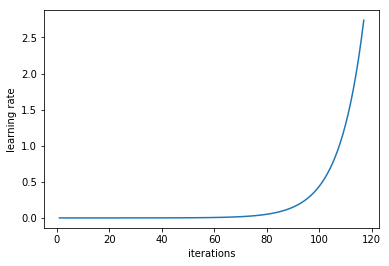

In [46]:
learn.sched.plot_lr()

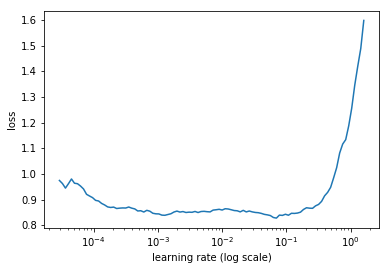

In [47]:
learn.sched.plot()

In [48]:
learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])

### >>> As métricas abaixo não representam o resultado real do modelo pois retirei as imagens do validation set para usá-las também no treinamento. Dessa forma, o resultado apresentado é ruim considerando que só existem duas imagens no validation set.

In [49]:
# Reduzindo a quantidade de imagens de validação
val_idxs = get_cv_idxs(10)
tfms = tfms_from_model(resnet34, SIZE, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(DATA_DIR, 'train', labels_csv, tfms=tfms, suffix='.jpg', val_idxs=val_idxs, test_name='test')
learn = ConvLearner.pretrained(resnet34, data, precompute=False)
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      2.328889   1.811444   0.5       
    1      1.245623   0.830655   0.5                        
    2      0.956974   0.80054    0.5                         
    3      0.832898   0.580991   0.5                         
    4      0.706208   0.799515   0.5                         
    5      0.652775   0.717536   0.5                         
    6      0.627619   0.730188   0.5                         
    7      0.630115   0.5127     0.5                         
    8      0.567011   0.413246   0.5                         
    9      0.546586   0.467601   0.5                         
    10     0.498741   0.419086   0.5                         
    11     0.491017   0.382233   1.0                         
    12     0.473178   0.305754   1.0                         
    13     0.46455    0.405974   0.5                         
    14     0.441655   0.316755   1.0                         



[0.3167553, 1.0]

## Submissão dos resultados

Carregarmos o aruqivo de exemplo de submissão para e mostramos abaixo.

In [50]:
import pandas as pd
d=pd.read_csv(os.path.join(DATA_DIR, 'sample_submission.csv'))
d.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


Na função `learn.predict()` a seguir, utilizamos o parâmetro `is_test=True` para gerar as predições dos dados de teste ao invés das prediçõe dos dados de validação, o que é o padrão.

In [51]:
log_preds = learn.TTA(is_test=True)
probs = np.mean(np.exp(log_preds[0]), axis=0)

Utilizando o Pandas, criamos um data frame com a mesma estrutura do arquivo de submissão de exemplo, utilizando as probabilidades inferidas pelo mdelo nos dados de teste como dados.

In [52]:
# Cria data frame para submissão, com as probabilidades calculadas pelo modelo
df=pd.DataFrame(
    data=probs,
    columns=d.columns[1:], # Excluir primeira coluna, que é o ID
    index=[f[5:-4] for f in data.test_dl.dataset.fnames] 
)
df.index.name = 'id'

# Salva dataframe em arquivo CSV para envio para o Kaggle
arquivo_submissao = os.path.join(DATA_DIR,'fastai_submission6.csv')
df.to_csv(arquivo_submissao)

Formata comando para submissão através da ferramenta oficial do Kaggle

In [53]:
arquivo_submissao = '/home/paperspace/.kaggle/competitions/dog-breed-identification/fastai_submission6.csv'
comando = f'kaggle competitions submit -c dog-breed-identification -f {arquivo_submissao} -m "Submissão de teste 6"'
print(comando)

kaggle competitions submit -c dog-breed-identification -f /home/paperspace/.kaggle/competitions/dog-breed-identification/fastai_submission6.csv -m "Submissão de teste 6"


In [54]:
!kaggle competitions submit -c dog-breed-identification -f /home/paperspace/.kaggle/competitions/dog-breed-identification/fastai_submission6.csv -m "Submissão de teste 6"

Successfully submitted to Dog Breed Identification

## Ao submeter esses dados, o resultado alcançado foi de uma loss function de 0,40065